In [137]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('training.csv')
unique_values =  np.unique(df['topic'])


#feature Engineering: want word count and tf-idf
#there is no capital letters, no punctuation, they are separated by commas

#get rid of commas/punctuation
punctuation_signs = list("?:!.,;")
df['article_words_parse_1'] = df['article_words']

for punct_sign in punctuation_signs:
    df['article_words_parse_1'] = df['article_words_parse_1'].str.replace(punct_sign, ' ')
    
#all lower case
df['article_words_parse_2'] = df['article_words_parse_1'].str.lower()

#NO STEMMING NO LEMMISATION, NO STOP WORDS

#Category Numbers
category_codes = {
    'ARTS CULTURE ENTERTAINMENT': 0,
    'BIOGRAPHIES PERSONALITIES PEOPLE': 1,
    'DEFENCE': 2,
    'DOMESTIC MARKETS': 3,
    'FOREX MARKETS': 4,
    'HEALTH': 5,
    'IRRELEVANT': 6,
    'MONEY MARKETS': 7,
    'SCIENCE AND TECHNOLOGY': 8,
    'SHARE LISTINGS': 9,
    'SPORTS': 10
}

# Category mapping
df['Category_Code'] = df['topic']
df = df.replace({'Category_Code':category_codes})


#FROM THE TEXTBOOK------------------------------------------------
bards_words = df['article_words_parse_2']
vect = CountVectorizer()
vect.fit(bards_words)


bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

#print("Dense representation of bag_of_words:\n{}".format(
#bag_of_words.toarray()))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

#scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)


#-----------------------------------------------------------

#Train, test Split
X_train, X_test, y_train, y_test = train_test_split(df['article_words_parse_2'], 
                                                    df['Category_Code'], 
                                                    test_size=0.15, 
                                                    random_state=8)



#TF-IDF
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=300,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)


#see which unigrams and bigrams are common
for Product, category_id in sorted(category_codes.items()):
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

#63 Bigrams




bag_of_words: <9500x35822 sparse matrix of type '<class 'numpy.int64'>'
	with 760419 stored elements in Compressed Sparse Row format>
Number of features: 35822
First 20 features:
['_____', '______', '_______', '____________', '_bret', 'a1', 'a1b1', 'a2', 'a3', 'a300', 'a300b4', 'a320', 'a330', 'a340', 'a4', 'a5', 'a6', 'a7', 'a78', 'a7e']
Features 20010 to 20030:
['menzy', 'mep', 'mer', 'meralc', 'merc', 'mercad', 'mercado', 'mercantil', 'mercaton', 'merced', 'mercen', 'merch', 'merchandis', 'merci', 'mercilon', 'merck', 'merckx', 'mercosur', 'mercur', 'mercurio']
Every 2000th feature:
['_____', 'athibid', 'boulai', 'clar', 'derrick', 'essilor', 'generat', 'hochschild', 'joing', 'lepag', 'menot', 'nissim', 'persever', 'real', 'schipol', 'stamped', 'tollefson', 'vire']
(8075, 300)
(1425, 300)
# 'ARTS CULTURE ENTERTAINMENT' category:
  . Most correlated unigrams:
. direct
. top
. work
. peopl
. show
  . Most correlated bigrams:
. dollar dollar
. bank bank

# 'BIOGRAPHIES PERSONALITIES PE

# Multinominal Naive Bayes

The training accuracy is: 
0.7302786377708979
The test accuracy is: 
0.7164912280701754
Classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        20
           2       0.38      0.16      0.22        38
           3       0.50      0.17      0.25        12
           4       0.52      0.39      0.45       142
           5       0.00      0.00      0.00        31
           6       0.75      0.89      0.82       733
           7       0.61      0.66      0.63       240
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        23
          10       0.87      0.90      0.88       160

    accuracy                           0.72      1425
   macro avg       0.33      0.29      0.30      1425
weighted avg       0.65      0.72      0.68      1425

      article_number                                      article_words  \
0 

C:\Users\Stephen Sung\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


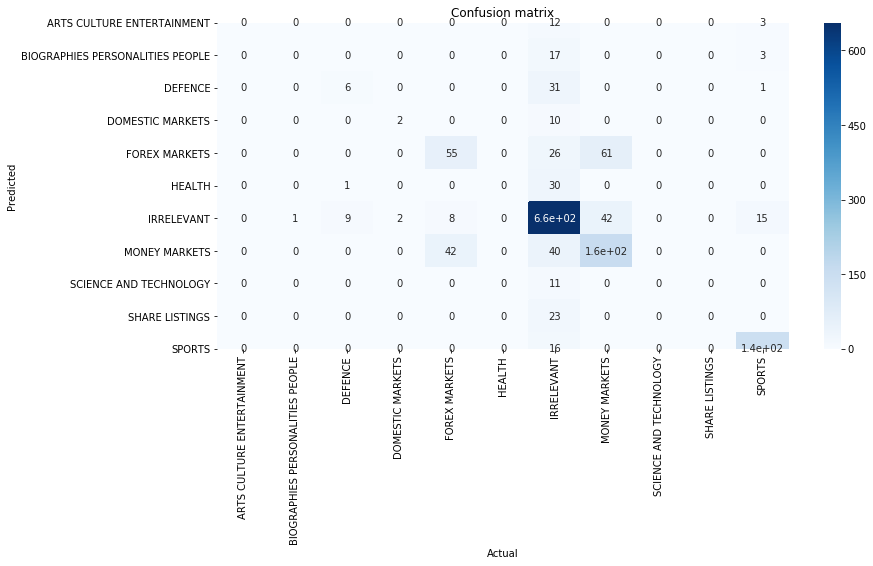

In [138]:
mnbc = MultinomialNB()
mnbc

mnbc.fit(features_train, labels_train)
mnbc_pred = mnbc.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))


# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

print(df)

aux_df = df[['topic', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['topic'].values, 
            yticklabels=aux_df['topic'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()